In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/who-covid-19-cases-dataset/WHO COVID-19 cases.csv


# 1. **Data Import**

In [2]:
df = pd.read_csv("/kaggle/input/who-covid-19-cases-dataset/WHO COVID-19 cases.csv")

In [3]:
df.head()

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0


# 2. **Data Cleaning**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58560 entries, 0 to 58559
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      58560 non-null  object 
 1   Country_code       58316 non-null  object 
 2   Country            58560 non-null  object 
 3   Continent          58560 non-null  object 
 4   WHO_region         54168 non-null  object 
 5   New_cases          39260 non-null  float64
 6   Cumulative_cases   58560 non-null  int64  
 7   New_deaths         25084 non-null  float64
 8   Cumulative_deaths  58560 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 4.0+ MB


In [5]:
print(df.isnull().sum())
print(df.duplicated().sum())

Date_reported            0
Country_code           244
Country                  0
Continent                0
WHO_region            4392
New_cases            19300
Cumulative_cases         0
New_deaths           33476
Cumulative_deaths        0
dtype: int64
0


In [6]:
df.drop("Country_code",axis = 1,inplace = True)

In [7]:
df["New_cases"].fillna(0, inplace = True)

In [8]:
df["New_deaths"].fillna(0,inplace = True)

In [9]:
df['Continent'].value_counts()

Continent
Africa           13908
Europe           11956
Asia             11712
North America    10248
Oceania           4636
South America     3172
Uncategorized     1464
island            1464
Name: count, dtype: int64

In [10]:
df.groupby('Continent')['WHO_region'].unique().reset_index()

,Continent,WHO_region
0,Africa,"[AFRO, EMRO, nan]"
1,Asia,"[EMRO, EURO, SEARO, WPRO]"
2,Europe,"[EURO, nan]"
3,North America,"[AMRO, nan, EURO]"
4,Oceania,[WPRO]
5,South America,"[AMRO, nan]"
6,Uncategorized,[OTHER]
7,island,"[WPRO, nan]"


In [11]:
Conti_who = {"South America" : "AMRO",
            "Europe" : "EURO",
            "Africa" : "AFRO",
            "island" : "WPRO",
            "North America" : "AMRO"}

In [12]:
df['WHO_region'] = df['WHO_region'].combine_first(df['Continent'].map(Conti_who))

In [13]:
df.groupby('Continent')['WHO_region'].unique().reset_index()

,Continent,WHO_region
0,Africa,"[AFRO, EMRO]"
1,Asia,"[EMRO, EURO, SEARO, WPRO]"
2,Europe,[EURO]
3,North America,"[AMRO, EURO]"
4,Oceania,[WPRO]
5,South America,[AMRO]
6,Uncategorized,[OTHER]
7,island,[WPRO]


In [14]:
a = df["Date_reported"].str.split("-")
df["Year"] = [d[0] for d in a]
df["Month"] = [d[1] for d in a]
df["Day"] = [d[2] for d in a]

In [15]:
df = df.drop("Date_reported",axis = 1)

In [16]:
cols = ['Year', 'Month', 'Day','New_cases','New_deaths']

for col in cols:
    df[col] = df[col].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58560 entries, 0 to 58559
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            58560 non-null  object
 1   Continent          58560 non-null  object
 2   WHO_region         58560 non-null  object
 3   New_cases          58560 non-null  int64 
 4   Cumulative_cases   58560 non-null  int64 
 5   New_deaths         58560 non-null  int64 
 6   Cumulative_deaths  58560 non-null  int64 
 7   Year               58560 non-null  int64 
 8   Month              58560 non-null  int64 
 9   Day                58560 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 4.5+ MB


# 3. **Analysis**

In [18]:
df.head()

,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month,Day
0,Afghanistan,Asia,EMRO,0,0,0,0,2020,1,5
1,Afghanistan,Asia,EMRO,0,0,0,0,2020,1,12
2,Afghanistan,Asia,EMRO,0,0,0,0,2020,1,19
3,Afghanistan,Asia,EMRO,0,0,0,0,2020,1,26
4,Afghanistan,Asia,EMRO,0,0,0,0,2020,2,2


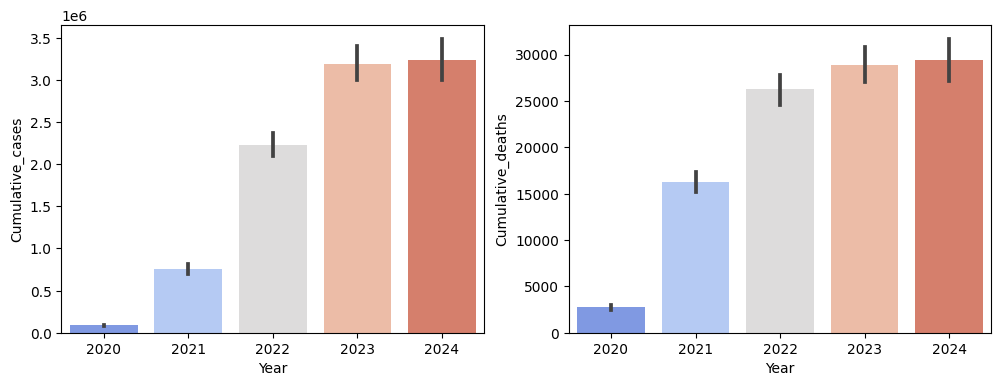

In [19]:
plt.figure(figsize = (12,4))
plt.subplot(1, 2, 1)
sns.barplot(x=df['Year'], y=df['Cumulative_cases'],palette = "coolwarm")

plt.subplot(1, 2, 2)
sns.barplot(x=df['Year'], y=df['Cumulative_deaths'],palette = "coolwarm")
plt.show()

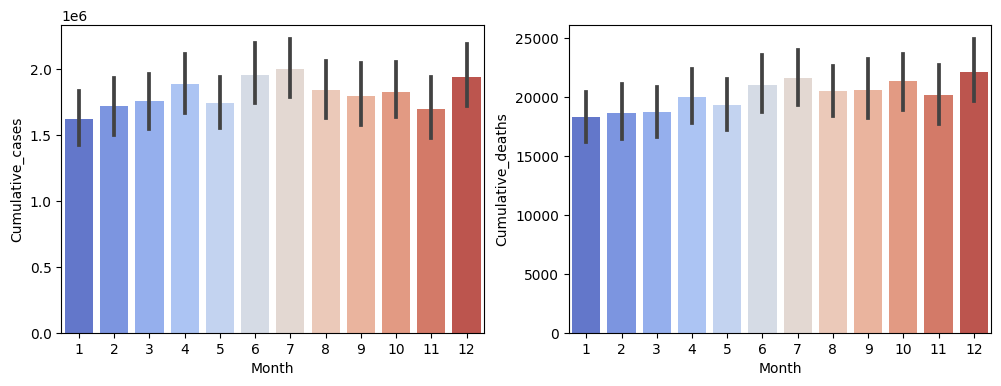

In [20]:
plt.figure(figsize = (12,4))
plt.subplot(1, 2, 1)
sns.barplot(x=df['Month'], y=df['Cumulative_cases'],palette = "coolwarm")

plt.subplot(1, 2, 2)
sns.barplot(x=df['Month'], y=df['Cumulative_deaths'],palette = "coolwarm")
plt.show()

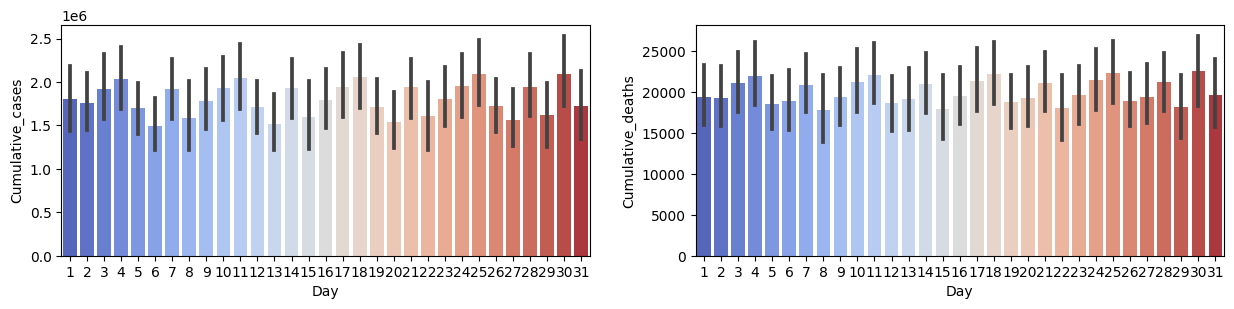

In [21]:
plt.figure(figsize = (15,3))
plt.subplot(1, 2, 1)
sns.barplot(x=df['Day'], y=df['Cumulative_cases'],palette = "coolwarm")

plt.subplot(1, 2, 2)
sns.barplot(x=df['Day'], y=df['Cumulative_deaths'],palette = "coolwarm")
plt.show()

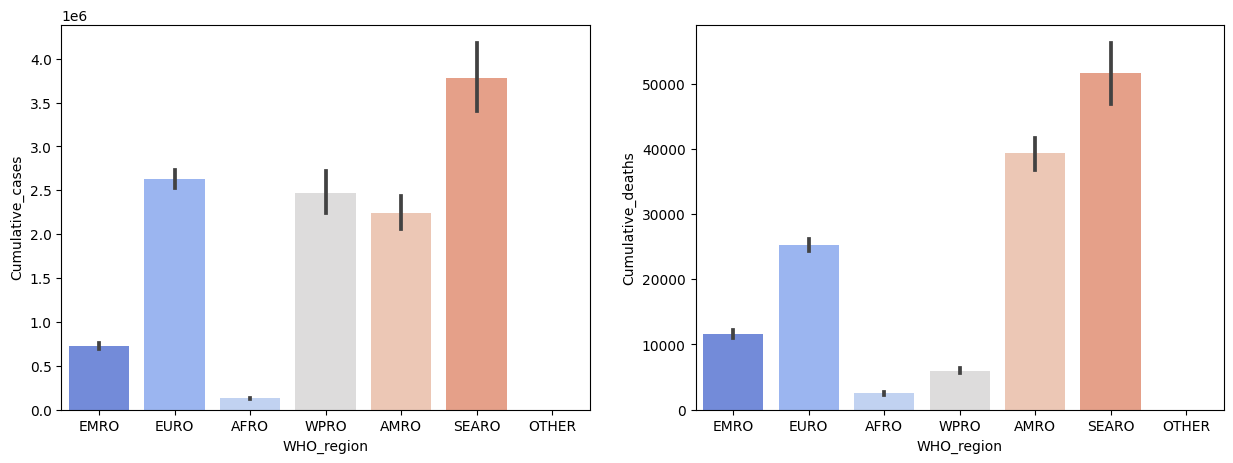

In [22]:
# Country	Continent	WHO_region

plt.figure(figsize = (15,5))
plt.subplot(1, 2, 1)
sns.barplot(x=df['WHO_region'], y=df['Cumulative_cases'],palette = "coolwarm")

plt.subplot(1, 2, 2)
sns.barplot(x=df['WHO_region'], y=df['Cumulative_deaths'],palette = "coolwarm")
plt.show()

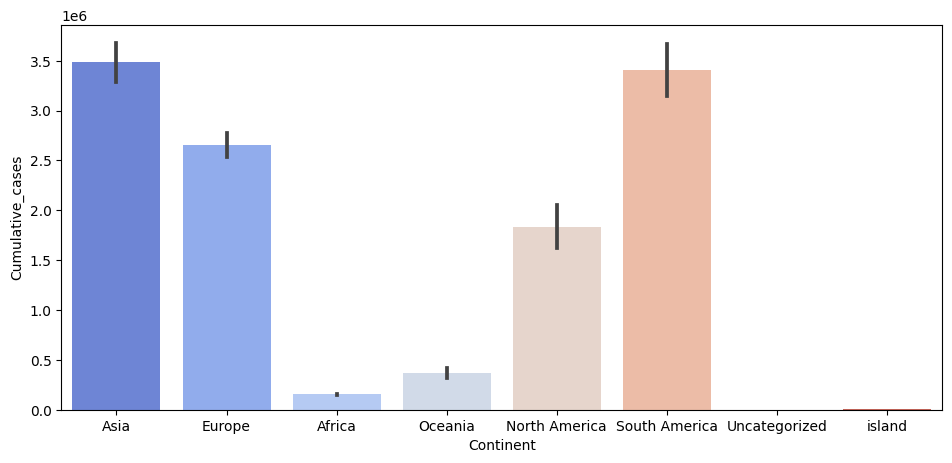

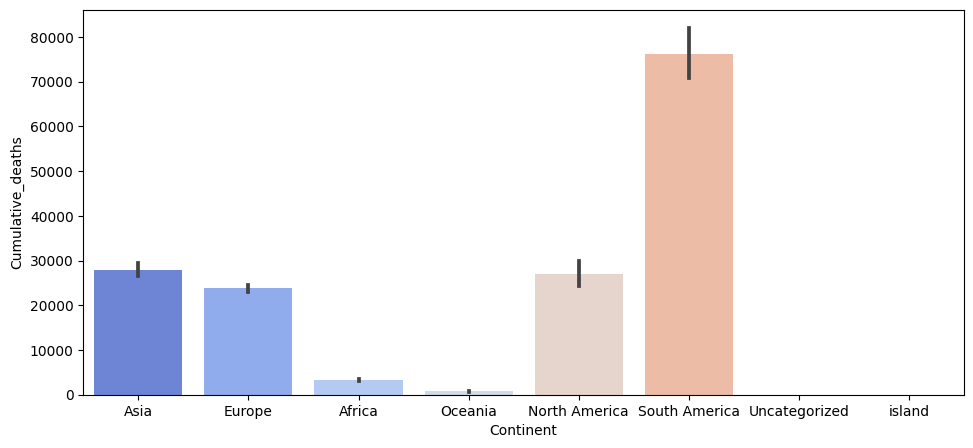

In [23]:
plt.figure(figsize = (25,5))
plt.subplot(1, 2, 1)
sns.barplot(x=df['Continent'], y=df['Cumulative_cases'],palette = "coolwarm")
plt.show()

plt.figure(figsize = (25,5))
plt.subplot(1, 2, 2)
sns.barplot(x=df['Continent'], y=df['Cumulative_deaths'],palette = "coolwarm")
plt.show()

# 4. **PreProcessing**

In [24]:
cols = ['Year', 'Month', 'Day','New_cases','New_deaths']

for col in cols:
    df[col] = df[col].astype(int)

In [25]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [26]:
cols = ["Country", "Continent", "WHO_region"]

for i in cols:
    df[i] = label.fit_transform(df[i])

In [27]:
df.corr()

,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month,Day
Country,1.000000e+00,-4.911818e-04,1.228665e-01,0.003745,0.028884,0.031137,0.048048,-5.465278e-12,-2.507703e-15,-1.036814e-15
Continent,-4.911818e-04,1.000000e+00,4.057777e-01,-0.001165,0.005738,0.034870,0.062948,-7.830705e-14,3.163477e-16,-3.857880e-16
WHO_region,1.228665e-01,4.057777e-01,1.000000e+00,0.029675,0.087771,0.001901,-0.005052,-9.020761e-13,-1.220885e-16,-1.583266e-16
New_cases,3.744986e-03,-1.164864e-03,2.967511e-02,1.000000,0.162430,0.294423,0.122155,-1.036727e-02,-7.738908e-03,1.393315e-03
Cumulative_cases,2.888399e-02,5.737615e-03,8.777061e-02,0.162430,1.000000,0.234503,0.792750,1.564629e-01,6.271821e-03,1.079896e-03
New_deaths,3.113722e-02,3.487027e-02,1.901132e-03,0.294423,0.234503,1.000000,0.342313,-9.343243e-02,-3.050754e-03,3.581148e-03
Cumulative_deaths,4.804819e-02,6.294841e-02,-5.052076e-03,0.122155,0.792750,0.342313,1.000000,1.147598e-01,1.212002e-02,1.829975e-03
Year,-5.465278e-12,-7.830705e-14,-9.020761e-13,-0.010367,0.156463,-0.093432,0.114760,1.000000e+00,-1.239383e-01,-1.588379e-03
Month,-2.507703e-15,3.163477e-16,-1.220885e-16,-0.007739,0.006272,-0.003051,0.012120,-1.239383e-01,1.000000e+00,-9.927923e-03
Day,-1.036814e-15,-3.857880e-16,-1.583266e-16,0.001393,0.001080,0.003581,0.001830,-1.588379e-03,-9.927923e-03,1.000000e+00


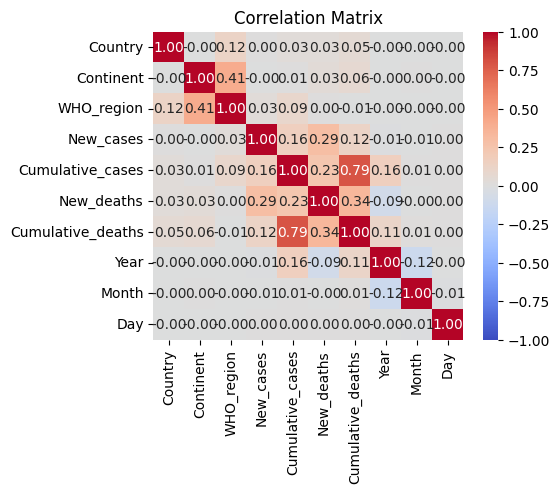

In [28]:
plt.figure(figsize=(5, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [29]:
df.describe()

,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month,Day
count,58560.000000,58560.000000,58560.000000,5.856000e+04,5.856000e+04,58560.000000,5.856000e+04,58560.000000,58560.000000,58560.000000
mean,119.500000,2.045833,2.400000,1.325372e+04,1.810312e+06,120.582821,2.012550e+04,2021.864754,6.221311,15.799180
std,69.282022,1.775421,2.016202,2.212564e+05,7.851277e+06,805.691725,8.220948e+04,1.355838,3.382753,8.805616
min,0.000000,0.000000,0.000000,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00,2020.000000,1.000000,1.000000
25%,59.750000,1.000000,1.000000,0.000000e+00,4.402750e+03,0.000000,2.900000e+01,2021.000000,3.000000,8.000000
50%,119.500000,2.000000,2.000000,4.400000e+01,4.682750e+04,0.000000,5.845000e+02,2022.000000,6.000000,16.000000
75%,179.250000,3.000000,3.000000,1.201000e+03,5.351678e+05,12.000000,7.118000e+03,2023.000000,9.000000,23.250000
max,239.000000,7.000000,6.000000,4.047548e+07,1.034368e+08,47687.000000,1.197213e+06,2024.000000,12.000000,31.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58560 entries, 0 to 58559
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Country            58560 non-null  int64
 1   Continent          58560 non-null  int64
 2   WHO_region         58560 non-null  int64
 3   New_cases          58560 non-null  int64
 4   Cumulative_cases   58560 non-null  int64
 5   New_deaths         58560 non-null  int64
 6   Cumulative_deaths  58560 non-null  int64
 7   Year               58560 non-null  int64
 8   Month              58560 non-null  int64
 9   Day                58560 non-null  int64
dtypes: int64(10)
memory usage: 4.5 MB


# 5. **Model Training**

In [31]:
# Spliting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("Cumulative_deaths",axis=1), df["Cumulative_deaths"], test_size=0.2, random_state=42)

In [32]:
# Apply scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix

In [34]:
models = {"Linear_reg" : LinearRegression(),
"KNN" : KNeighborsRegressor(),
"Desi_tree" : DecisionTreeRegressor(),
"R_forest" : RandomForestRegressor()
         }

In [35]:
trained_models = []
for model_name, model in models.items():
    model.fit(X_train_scaled,y_train)
    trained_models.append((model_name, model))

In [36]:
trained_models

[('Linear_reg', LinearRegression()),
 ('KNN', KNeighborsRegressor()),
 ('Desi_tree', DecisionTreeRegressor()),
 ('R_forest', RandomForestRegressor())]

# 6. **ML Score**

In [37]:
metrics_list = []

for model_name, model in models.items():

    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics_list.append({
        'Model': model_name,
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'R-squared': r2,
    })

# Display the metrics list
metrics_list

[{'Model': 'Linear_reg',
  'Mean Squared Error': 2417888674.0170603,
  'Mean Absolute Error': 17134.7870599836,
  'R-squared': 0.6520591360686728},
 {'Model': 'KNN',
  'Mean Squared Error': 319270843.85343236,
  'Mean Absolute Error': 5489.995952868852,
  'R-squared': 0.9540560430129782},
 {'Model': 'Desi_tree',
  'Mean Squared Error': 8609555.738302596,
  'Mean Absolute Error': 335.9481728142076,
  'R-squared': 0.998761061129968},
 {'Model': 'R_forest',
  'Mean Squared Error': 2718360.8601249317,
  'Mean Absolute Error': 302.57481557377054,
  'R-squared': 0.9996088203578961}]

In [38]:
metrics_df = pd.DataFrame(metrics_list)
print(metrics_df)

        Model  Mean Squared Error  Mean Absolute Error  R-squared
0  Linear_reg        2.417889e+09         17134.787060   0.652059
1         KNN        3.192708e+08          5489.995953   0.954056
2   Desi_tree        8.609556e+06           335.948173   0.998761
3    R_forest        2.718361e+06           302.574816   0.999609


In [39]:
best_model = metrics_df.loc[metrics_df['R-squared'].idxmax()]
print(best_model)

Model                        R_forest
Mean Squared Error     2718360.860125
Mean Absolute Error        302.574816
R-squared                    0.999609
Name: 3, dtype: object


In [40]:
train_accuracy = model.score(X_train_scaled, y_train)
print(f"Training Accuracy: {round(train_accuracy*100,2)}")

test_accuracy = model.score(X_test_scaled, y_test)
print(f"Test Accuracy: {round(test_accuracy*100,2)}")


Training Accuracy: 99.99
Test Accuracy: 99.96


# 7. **Test the model**

In [41]:
model.predict(scaler.transform([[122,1,2,0,1239904,0,2023,12,3]]))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([10947.])

In [42]:
X_train.head()

,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Year,Month,Day
29972,122,1,2,0,1239904,0,2023,12,3
28147,115,0,0,5103,239692,84,2021,9,5
38656,158,4,6,0,0,0,2022,1,2
15673,64,0,0,191,2326,0,2021,2,7
18551,76,0,0,0,0,0,2020,2,23


In [43]:
y_train.head()

29972    10947
28147     4778
38656        0
15673        7
18551        0
Name: Cumulative_deaths, dtype: int64